## Overview 

This script explores the dataset `gestures-hand` then the dataset is used to train a CNN model and plot its accuracy and loss.



## Importing dependencies

First let us import all the modules and packages that will be required.

In [1]:
# Importing import modules
import numpy as np 
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from skimage import io
print(os.listdir("../input/gestures-hand/data/data"))

['validation', 'test', 'train']


The dataset is already been split into train, test and validation (so we dont need to do it later on) 

In [2]:
# Train, test and validation directories
train_dir = "../input/gestures-hand/data/data/train"
val_dir = "../input/gestures-hand/data/data/validation"
test_dir = "../input/gestures-hand/data/data/test"

## Exploring the dataset

The dataset contains three different directories called `train`, `test` and `validation`. Each of these directories contain 7 sub-directories which essentially refer to the six types of hand gestures i.e. `five`, `fist`, `rad`, `okay`, `peace`, `straight` and `thumbs`. Additionally, there is a `none` directory which contains images of the background without any hand in it which can be used as initial background setup. 

All the images in the dataset have been preprocessed already via OpenCV's background subtraction algorithms by the following steps :
* Applying smoothing filter that keeps edges sharp using `cv2.bilateralFilter`
* Removing background like eroding background using `cv2.erode` , etc.
* Create a background mask
* Created a Region of Interest (ROI)
* Converting image to gray using `cv2.cvtColor`
* Blurring the image using `cv2.GaussianBlur`
* Thresholding the image using `cv2.threshold`


### Visualising each gesture 
Show one image of the each of the 8 classes present.

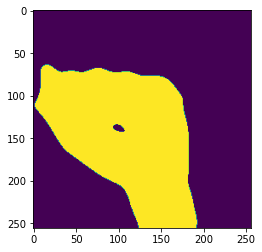

In [3]:
img_array1 = np.array(Image.open('../input/gestures-hand/data/data/train/fist/123.png'))
plt.imshow(img_array1)

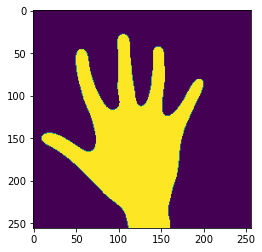

In [4]:
img_array2 = np.array(Image.open('../input/gestures-hand/data/data/train/five/123.png'))
plt.imshow(img_array2)

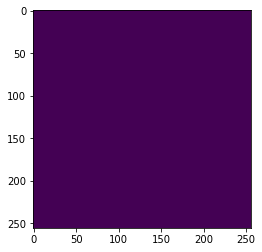

In [5]:
img_array3 = np.array(Image.open('../input/gestures-hand/data/data/train/none/123.png'))
plt.imshow(img_array3)

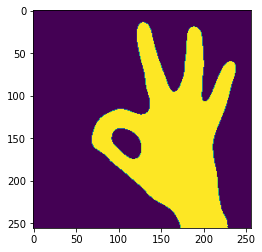

In [6]:
img_array4 = np.array(Image.open('../input/gestures-hand/data/data/train/okay/123.png'))
plt.imshow(img_array4)

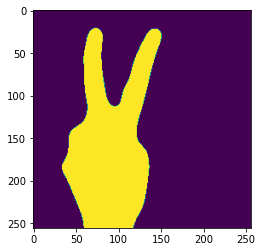

In [7]:
img_array5 = np.array(Image.open('../input/gestures-hand/data/data/train/peace/123.png'))
plt.imshow(img_array5)

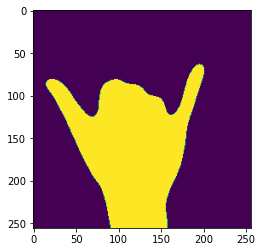

In [8]:
img_array6 = np.array(Image.open('../input/gestures-hand/data/data/train/rad/123.png'))
plt.imshow(img_array6)

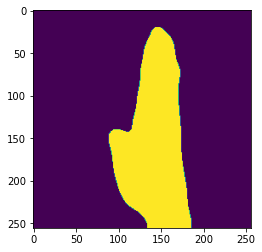

In [9]:
img_array7 = np.array(Image.open('../input/gestures-hand/data/data/train/straight/123.png'))
plt.imshow(img_array7)

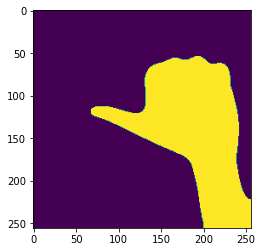

In [10]:
img_array8 = np.array(Image.open('../input/gestures-hand/data/data/train/thumbs/123.png'))
plt.imshow(img_array8)

The variable `outputSize` refers to the number of different hand gestures in the dataset. Since it is a multi-class classification model, this will determine the number of units in the final dense layer preceeding the softmax activation.

In [11]:
# Declaring variables
outputSize = len(os.listdir(train_dir)) 
epochs = 15 # Number of epochs

## Data Augmentation

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.

The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the `ImageDataGenerator` class.

First, the class may be instantiated and the configuration for the types of data augmentation are specified by arguments to the class constructor.

A range of techniques are supported, as well as pixel scaling methods. We will focus on five main types of data augmentation techniques for image data; specifically:

 * Image shifts via the `width_shift_range` and `height_shift_range` arguments.
 *   Image flips via the `horizontal_flip` arguments.
 *   Image rotations via the `rotation_range` argument
 *  Shear angle in counter-clockwise direction in degrees via the `shear_range` argument.
 *  Image zoom via the `zoom_range `argument.


In [12]:
# Train Data Generator to do data augmentation on training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [13]:
# Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
# Setting up the train generator to flow from the train directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

# Doing the same as above for the validation directory
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 7999 images belonging to 8 classes.
Found 3999 images belonging to 8 classes.


## Defining the CNN


In [15]:
# Function to create keras model for different number of gestures
def create_model(outputSize):
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (256,256,1)))
    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))
    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))
    model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
    model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))
    model.add(Flatten())
    model.add(Dropout(rate = 0.5))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(units = outputSize, activation = 'softmax'))
    model.compile(optimizer = Adam(lr=1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [16]:
# Creating the model
model = create_model(outputSize)

In [17]:
# Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 128)       7

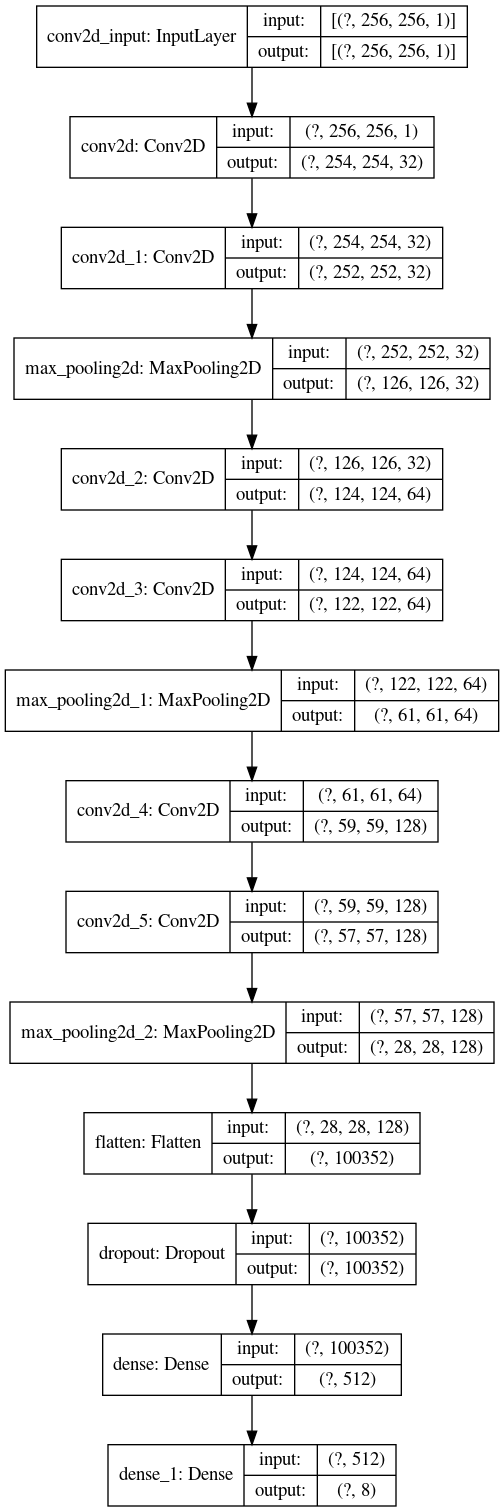

In [18]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [19]:
# Fitting the model to the data based on a 32 batch size
history = model.fit_generator(
    train_generator,
    steps_per_epoch=outputSize*1000/32,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=outputSize*500/32
)

Epoch 1/15
250/250 [==============================] - 77s 310ms/step - loss: 1.0807 - accuracy: 0.5746 - val_loss: 0.6063 - val_accuracy: 0.7082
Epoch 2/15
250/250 [==============================] - 53s 213ms/step - loss: 0.5631 - accuracy: 0.7851 - val_loss: 0.3381 - val_accuracy: 0.8837
Epoch 3/15
250/250 [==============================] - 52s 206ms/step - loss: 0.4006 - accuracy: 0.8547 - val_loss: 0.1556 - val_accuracy: 0.9562
Epoch 4/15
250/250 [==============================] - 52s 208ms/step - loss: 0.3194 - accuracy: 0.8886 - val_loss: 0.1507 - val_accuracy: 0.9590
Epoch 5/15
250/250 [==============================] - 51s 205ms/step - loss: 0.2946 - accuracy: 0.8969 - val_loss: 0.1680 - val_accuracy: 0.9392
Epoch 6/15
250/250 [==============================] - 52s 207ms/step - loss: 0.2506 - accuracy: 0.9145 - val_loss: 0.0966 - val_accuracy: 0.9677
Epoch 7/15
250/250 [==============================] - 53s 214ms/step - loss: 0.2086 - accuracy: 0.9281 - val_loss: 0.1116 - val_ac

## Results and Performance Metrics

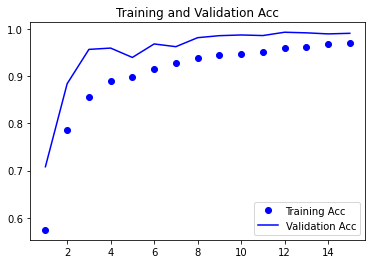

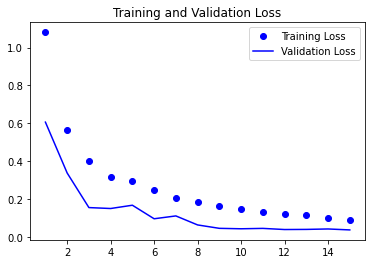

<Figure size 432x288 with 0 Axes>

In [20]:
# Plotting training acc/loss and val acc/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
range_ep = epochs +1
epoch_x = range(1, range_ep)

plt.plot(epoch_x,acc,'bo',label="Training Acc")
plt.plot(epoch_x,val_acc,'b',label='Validation Acc')
plt.title('Training and Validation Acc')
plt.legend()
plt.figure()

plt.plot(epoch_x,loss,'bo',label="Training Loss")
plt.plot(epoch_x,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

plt.show()

In [21]:
# Setting up the test generator to flow from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 4000 images belonging to 8 classes.


In [22]:
# Test accuracy and test loss calc
test_loss, test_acc = model.evaluate_generator(test_generator,steps = outputSize*500/32)
print("Test Acc:",test_acc)
print("Test Loss:",test_loss)

Test Acc: 0.9919999837875366
Test Loss: 0.0322018601000309


# Predict Individual Images

In [26]:
# print(train_generator.class_indices)

{'fist': 0, 'five': 1, 'none': 2, 'okay': 3, 'peace': 4, 'rad': 5, 'straight': 6, 'thumbs': 7}


In [29]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(img_path):
    """
    Load and preprocess an image for prediction.

    Args:
        img_path (str): Path to the image file.

    Returns:
        np.ndarray: Preprocessed image array ready for model prediction.
    """
    img = image.load_img(img_path, target_size=(256, 256), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values
    return img_array

def predict_gesture(img_path, model, class_indices):
    """
    Predict the gesture class for a given image path using a trained model.

    Args:
        img_path (str): Path to the input image.
        model (keras.Model): Trained Keras model.
        class_indices (dict): Dictionary of class labels to indices.

    Returns:
        str: Predicted class name.
    """
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction[0])

    # Reverse mapping from index to class name
    index_to_class = {v: k for k, v in class_indices.items()}
    predicted_class_name = index_to_class[predicted_class_index]

    print("Predicted class index:", predicted_class_index)
    print("Predicted class name:", predicted_class_name)

    plt.imshow(img_array[0].reshape(256, 256), cmap='gray')
    plt.title(f"Predicted: {predicted_class_name}")
    plt.axis('off')
    plt.show()

    return predicted_class_name

Predicted class index: 1
Predicted class name: five


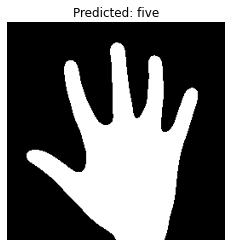

'five'

In [30]:
img_path = "/kaggle/input/gestures-hand/data/data/test/five/1.png"
predict_gesture(img_path, model, train_generator.class_indices)

Predicted class index: 0
Predicted class name: fist


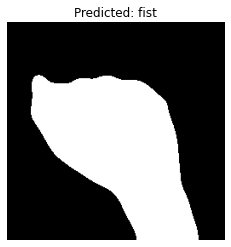

'fist'

In [37]:
img_path = "/kaggle/input/gestures-hand/data/data/test/fist/10.png"
predict_gesture(img_path, model, train_generator.class_indices)

Predicted class index: 3
Predicted class name: okay


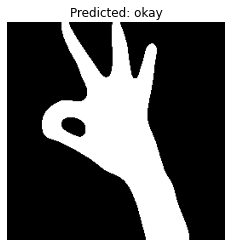

'okay'

In [39]:
img_path = "/kaggle/input/gestures-hand/data/data/test/okay/107.png"
predict_gesture(img_path, model, train_generator.class_indices)

Predicted class index: 4
Predicted class name: peace


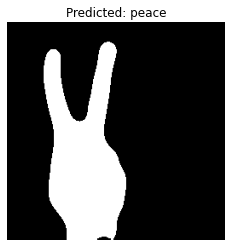

'peace'

In [44]:
img_path = "/kaggle/input/gestures-hand/data/data/test/peace/106.png"
predict_gesture(img_path, model, train_generator.class_indices)

Predicted class index: 5
Predicted class name: rad


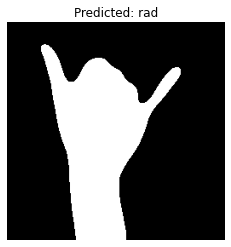

'rad'

In [40]:
img_path = "/kaggle/input/gestures-hand/data/data/test/rad/108.png"
predict_gesture(img_path, model, train_generator.class_indices)

Predicted class index: 6
Predicted class name: straight


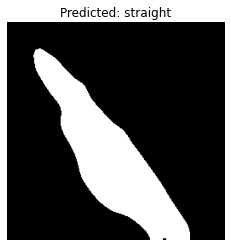

'straight'

In [43]:
img_path = "/kaggle/input/gestures-hand/data/data/test/straight/105.png"
predict_gesture(img_path, model, train_generator.class_indices)

Predicted class index: 7
Predicted class name: thumbs


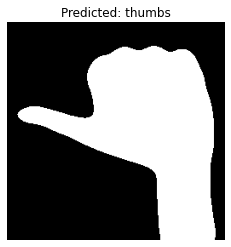

'thumbs'

In [42]:
img_path = "/kaggle/input/gestures-hand/data/data/test/thumbs/100.png"
predict_gesture(img_path, model, train_generator.class_indices)

## Saving Model and Model Weights

Model progress can be saved during and after training. This means a model can resume where it left off and avoid long training times. Saving also means you can share your model and others can recreate your work. When publishing research models and techniques, most machine learning practitioners share:

  * code to create the model, and
  * the trained weights, or parameters, for the model


In [23]:
# Model weights and model
model.save_weights('gesture_model_weights.h5')
model.save("gesture_model.h5")

## Future Work

The model can be improved by 
- reducing overfitting by earlystopping
- random train test split

